# **Tik-Tok Content Moderation: Classifying Videos as Claim or Opinion**

The project is about to build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

1. Our task is to build a machine learning model that is able to accurately classify videos as `claims` or `opinion` based on features we believe are relevant to this target variable. The relevant metric we will use to evaluate our taget model will comprise of the machine's ability to correctly identify True Positives (Claim Videos) and True Negatives (Opinion Videos) and minimze the occurences of Flase Positives and False Negatives.

2. The ethical implications of the model are that it will directly impact peoples livelihood given that some content creators live off what their content on Tik-Tok generates, so we need to be mindful that the results of our model could very well impact the lifestyle of another human being. An incorrect classification could lead to under exposure of a creators content which could very well lead them to failure in this career path.

3. I would use a machine learning model that is not prone to bias as well as I would implement cross-validation and bootstrapping techniques to ensure the model adjust for randomness and does not overfit on the training data.

### **Step 1. Imports and data loading**

Let's tart by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Import packages for data preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit


# Import packages for data modeling
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Import three methods for ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

In [2]:
data = pd.read_csv('tiktok_dataset.csv')

### **Step 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
data.isna().any(axis=1).sum()

298

In [9]:
# Drop rows with missing values
data = data.dropna(how='any')

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
data.duplicated().sum()

0

Check for and handle outliers.

In [12]:
# Define seaborn plotting style
sns.set(style="darkgrid")

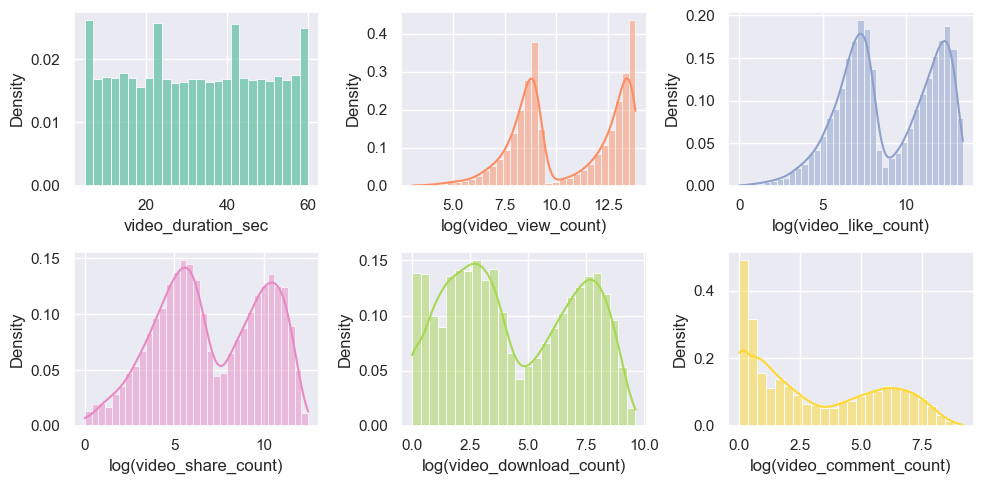

In [13]:
# We could use z-score to handle outliers but that assumes data is normally distributed
# from our previous work we know that some of the engagement metrics are heavily right skweed
# it could be beneficial to apply a log transform to attempt remove the skewness

plot_data = data.drop(columns=['#','claim_status','video_transcription_text','verified_status','author_ban_status',
                              'video_id'])
pallete = sns.color_palette("Set2",6)
fig, ax = plt.subplots(figsize=(10,5),ncols=3,nrows=2)
i = 0
for row in ax:
    for col in row:
        # Apply log transformation to remove skewness
        if i != 0:
            sns.histplot(np.log1p(plot_data[plot_data.columns[i]]),ax=col,stat='density',color=pallete[i],
                        kde=True)
            col.set_xlabel(f'log({plot_data.columns[i]})')
            
        else:
            sns.histplot(plot_data[plot_data.columns[i]],ax=col,stat='density',color=pallete[0])
            col.set_xlabel(plot_data.columns[i])
        
        i+=1

plt.tight_layout()

After a log transform the data appears to be bimodal, which won't allow the z-score to work properly because the mean and the stadard deviations are not representative of the data. However, we can still detect outliers using the IQR methods which sets an upper and lower bound based on the 1st and 3rd quantiles.
$$
\text{lower limit} = \text{Q}_1 - 1.5*\text{IQR}\\
\text{upper limit} = \text{Q}_3 + 1.5*\text{IQR}
$$

In [14]:
# Define bounds
Q1 = data.quantile(q=0.25,numeric_only=True)
Q3 = data.quantile(q=0.75,numeric_only=True)
IQR = Q3 - Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR

# Iterate through all columns that are relevant data
for col in IQR.keys():
    col_data = data[col]
    # Create mask where false labels correspond to outliers
    mask = np.logical_and(col_data  >= LB[col],col_data <= UB[col])
    print(col)
    print('# of True:',mask.value_counts()[0])
    print('# of False:',mask.shape[0] - mask.value_counts()[0],'\n')
    # Remove all rows with outliers in that column
    data = data[mask]

#
# of True: 19084
# of False: 0 

video_id
# of True: 19084
# of False: 0 

video_duration_sec
# of True: 19084
# of False: 0 

video_view_count
# of True: 19084
# of False: 0 

video_like_count
# of True: 17358
# of False: 1726 

video_share_count
# of True: 16084
# of False: 1274 

video_download_count
# of True: 15437
# of False: 647 

video_comment_count
# of True: 14851
# of False: 586 



We see that we start detecting outliers in `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`.

Check class balance.

In [15]:
data.claim_status.value_counts()

claim_status
opinion    9476
claim      5375
Name: count, dtype: int64

The class balance is approximately 64% to 36%, no class balancing is needed.

### **Step 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [16]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['video_transcription_length'] = data['video_transcription_text'].agg(lambda statement:len(statement))

Calculate the average text_length for claims and opinions.

In [17]:
average_claim_length = data[data['claim_status'] == 'claim']['video_transcription_length'].mean()
average_opinion_length = data[data['claim_status'] == 'opinion']['video_transcription_length'].mean()
print("Average text length for claims:", average_claim_length)
print("Average text length for opinions:", average_opinion_length)
# Display first few rows of dataframe after adding new column
data.head()

Average text length for claims: 95.65488372093023
Average text length for opinions: 82.72256226255804


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `text_length` for claims and opinions.

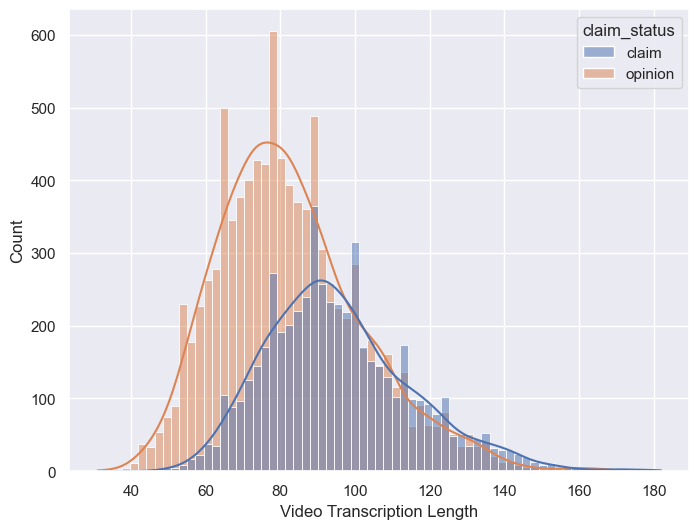

In [18]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data,x='video_transcription_length',hue='claim_status',ax=ax,kde=True)
ax.set_xlabel('Video Transcription Length')
plt.show()

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

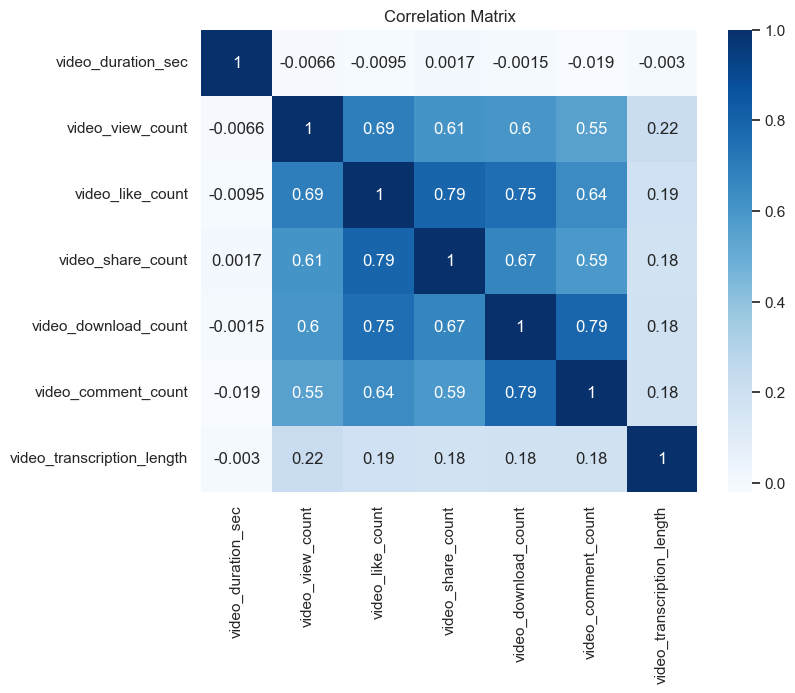

In [19]:
# Create a heatmap to visualize how correlated variables are
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data[['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count',
                            'video_comment_count','video_transcription_length']].corr(),annot=True,cmap='Blues',ax=ax)
plt.title("Correlation Matrix")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Feature selection and transformation**

Encode target and catgorical variables.

In [20]:
# Drop video transcript text column 
data = data.drop(columns=['video_transcription_text'])

In [21]:
data_enc = pd.get_dummies(data, drop_first=True,dtype='int64')

### **Step 4. Split the data**


Assign target variable.

In [22]:
y = data_enc['claim_status_opinion']

Isolate the features.

In [23]:
#Isolate features
X = data_enc.drop(columns=['claim_status_opinion','#'])

# Display first few rows of features dataframe
X.head()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,7017666017,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,4014381136,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,9859838091,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,1866847991,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,7105231098,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


### **Step 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [26]:
print("Train Size:",X_tr.size/(X_test.size + X_tr.size + X_val.size))
print("Test Size:",X_test.size/(X_test.size + X_tr.size + X_val.size))
print("Validation Size:",X_val.size/(X_test.size + X_tr.size + X_val.size))

Train Size: 0.5999595986802235
Test Size: 0.2000538684263686
Validation Size: 0.19998653289340784


This confirms the 60/20/20 split that was previously mentioned

## **Step 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [31]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Now we will create a dictionary of hyperparameters to tune
rf_cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125]
               }  

# Define a dictionary of scoring metrics to capture
scoring = 'recall'

# Create custom split for validation
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, rf_cv_params, scoring=['precision', 'recall', 'f1'], cv=custom_split, refit='f1')

In [32]:
%%time 
rf_cv.fit(X_train, y_train)

CPU times: total: 9min 13s
Wall time: 9min 31s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['precision', 'recall', 'f1'])

In [33]:
# Examine best recall score
rf_cv.best_score_

0.994750656167979

In [34]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the precision, recall, precision, and accuracy scores
    for the model with the best mean precision score across all validation folds.  
    '''
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Check available keys in cv_results
    print(cv_results.keys())
    
    # Choose the appropriate key for recall scores
    recall_key = 'mean_test_recall' if 'mean_test_recall' in cv_results.keys() else None
    
    # Choose the appropriate key for precision scores
    precision_key = 'mean_test_precision' if 'mean_test_precision' in cv_results.keys() else None
    
    # Isolate the row of the df with the max(mean recall score)
    best_estimator_results = cv_results.iloc[cv_results[recall_key].idxmax(), :] if recall_key else cv_results.iloc[0, :]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.get('mean_test_f1', None)
    recall = best_estimator_results.get(recall_key, None)
    precision = best_estimator_results.get(precision_key, None)
    accuracy = best_estimator_results.get('mean_test_accuracy', None)
  
    # Create table of results
    table = pd.DataFrame(
         {'model': [model_name],
          'precision': [precision],
          'recall': [recall],
          'F1': [f1],
          'accuracy': [accuracy],
         },
     )
  
    return table

# Call the make_results function to get the results
results = make_results("Tuned Random Forest", rf_cv)
print(results)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'mean_test_recall',
       'std_test_recall', 'rank_test_recall', 'split0_test_f1', 'mean_test_f1',
       'std_test_f1', 'rank_test_f1'],
      dtype='object')
                 model  precision  recall        F1 accuracy
0  Tuned Random Forest   0.966344     1.0  0.982884     None


In [35]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

**Question:** How well is our model performing? Consider average recall score and precision score.

**Answer:** 
The model is performing very well with all scores being above 98%, and a recall score of 100% which tells us that the model predicted no false positives.

### **Build an XGBoost model**

In [36]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic',random_state=0)

# Create a dictionary of hyperparameters to tune
xgb_cv_params = {"max_depth":[4,5,6,7],
            "min_child_weight":[1,2,3,4,5],
             "learning_rate":[0.1,0.2,0.3],
             "n_estimators":[5,10,15],
             "subsample":[0.6,0.9],
             "colsample_bytree":[0.6,0.9]
            }

# Define a dictionary of scoring metrics to capture
xgb_scoring = ["accuracy","precision_weighted","recall","f1_macro"]

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, xgb_cv_params, scoring=xgb_scoring, cv=5, refit='f1_macro')

In [37]:
%%time
# Fit the model
xgb_cv.fit(X_train, y_train)

CPU times: total: 16min 58s
Wall time: 5min 11s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.6, 0.9],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.6, 0.9]},
             refit='f1_macro',
             scoring=['accuracy', 'precision_weighted', 'recall', 'f1_macro'])

In [38]:
# Display best parameters
xgb_cv.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 15,
 'subsample': 0.9}

In [39]:
# Get all the results from the CV and put them in a df
make_results("Tuned XGBoost",xgb_cv)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bytree', 'param_learning_rate', 'param_max_depth',
       'param_min_child_weight', 'param_n_estimators', 'param_subsample',
       'params', 'split0_test_accuracy', 'split1_test_accuracy',
       'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy',
       'split0_test_precision_weighted', 'split1_test_precision_weighted',
       'split2_test_precision_weighted', 'split3_test_precision_weighted',
       'split4_test_precision_weighted', 'mean_test_precision_weighted',
       'std_test_precision_weighted', 'rank_test_precision_weighted',
       'split0_test_recall', 'split1_test_recall', 'split2_test_recall',
       'split3_test_recall', 'split4_test_recall', 'mean_test_recall',
       'std_test_recall', 'rank_test_recall', 'split0_test_f1_macro',
       'split1_test_f1_macro', 'split2_test_f1_macr

,model,precision,recall,F1,accuracy
0,Tuned XGBoost,None,1.0,None,0.975673


**Question:** How well does our model perform? Consider recall score and precision score.

**Answer:** The model appears to be performing well, especially in terms of recall and accuracy. However, the lack of precision scores makes it difficult to assess the model's performance in terms of precision-recall tradeoffs.

## **Step 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [40]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
rf_y_pred = rf_cv.predict(X_val)

Display the predictions on the encoded testing set.

In [41]:
# Display the predictions on the encoded testing set
rf_y_pred[:5]

array([0, 1, 1, 1, 1], dtype=int64)

Display the true labels of the testing set.

In [42]:
# Display the true labels of the testing set
y_val[:5]

577      0
13786    1
14976    1
16012    1
16031    1
Name: claim_status_opinion, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

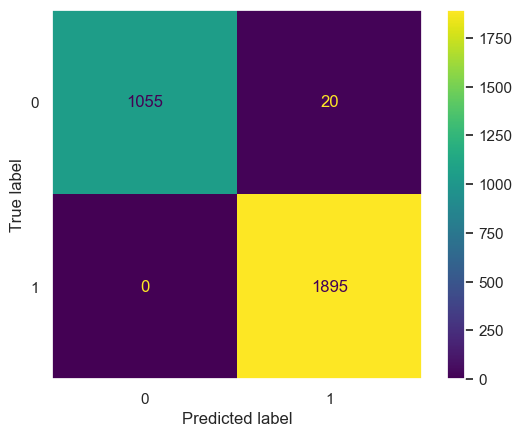

In [43]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
cm = confusion_matrix(y_val, rf_y_pred, labels=rf_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp.plot()
plt.grid(False)

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [44]:
# Create a classification report
# Create classification report for random forest model
# Compute metrics
rf_accuracy = accuracy_score(y_val,rf_y_pred)
rf_precision = precision_score(y_val,rf_y_pred)
rf_recall = precision_score(y_val, rf_y_pred)
rf_f1 = f1_score(y_val, rf_y_pred)

rf_table = pd.DataFrame({"Model":"Tuned Random Forest",
                        "F1":[rf_f1],
                        "Precision":[rf_precision],
                        "Recall":[rf_recall],
                        "Accuracy":[rf_accuracy]})
rf_table

,Model,F1,Precision,Recall,Accuracy
0,Tuned Random Forest,0.994751,0.989556,0.989556,0.993266


#### **XGBoost**

In [46]:
#Evaluate XGBoost model
xgb_y_pred = xgb_cv.predict(X_val)

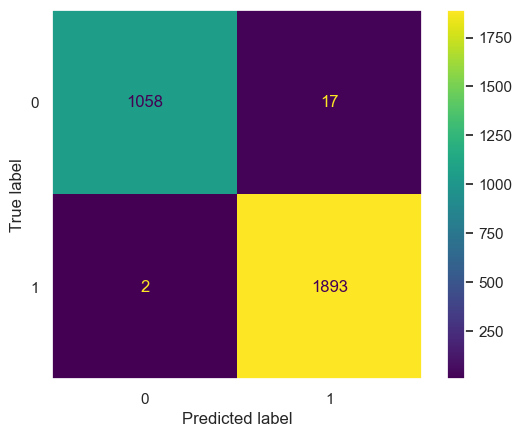

In [47]:
# Compute values for confusion matrix
cm = confusion_matrix(y_val, xgb_y_pred, labels=xgb_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
disp.plot()
plt.grid(False)

# Display plot
plt.show()

In [48]:
# Create a classification report
xgb_accuracy = accuracy_score(y_val,xgb_y_pred)
xgb_precision = precision_score(y_val,xgb_y_pred)
xgb_recall = precision_score(y_val, xgb_y_pred)
xgb_f1 = f1_score(y_val, xgb_y_pred)

xgb_table = pd.DataFrame({"Model":"Tuned Random Forest",
                        "F1":[xgb_f1],
                        "Precision":[xgb_precision],
                        "Recall":[xgb_recall],
                        "Accuracy":[xgb_accuracy]})
xgb_table

,Model,F1,Precision,Recall,Accuracy
0,Tuned Random Forest,0.995007,0.991099,0.991099,0.993603


### **Use champion model to predict on test data**

In [50]:
champ_pred = xgb_cv.predict(X_test)

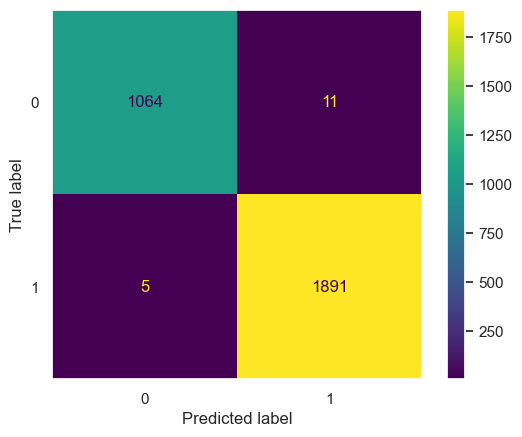

In [51]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, champ_pred, labels=xgb_cv.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
disp.plot()
plt.grid(False)

# Display plot
plt.show()

#### **Feature importances of champion model**


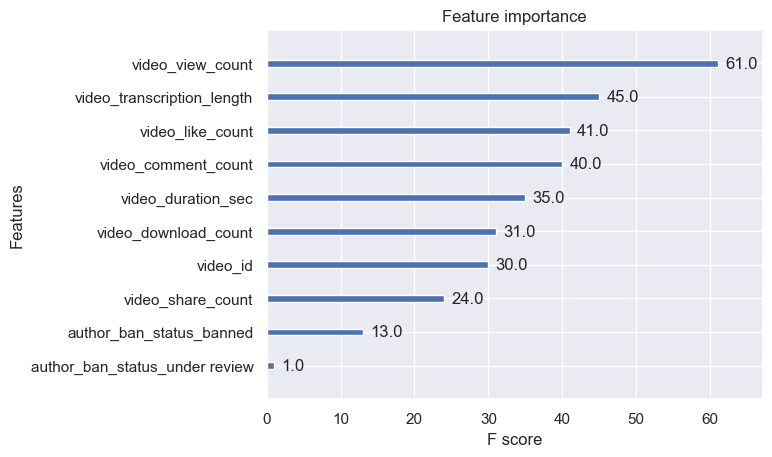

In [52]:
plot_importance(xgb_cv.best_estimator_)
plt.show()

**Question:** Describe your most predictive features. Were your results surprising?

**Answer:** The features that have the most predictive relevance to `claim status` are `video_view_count`, `video_transcription_lenght` and `video_like_count`. It's very interesting to see the built feature of the transcription length.

### **Task 8. Conclusion**

In this step using the results of the models above to we will formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

1) This model has very strong predictive power, with most of its evaluation metrics being $\sim$1% off from 100% accuracy, precision, recall and F1. These metrics as well as the confusion matrix indicate that the model can take all the engagement features we have selected and created and succesfully classify a video as a `claim` or `opinion`. We would recoment using this model to classify the back-log of videos that Tik-Tok is yet to go through.

2) Unfortunately since the model used is a Classifying Gradient Booster we cannot fully explain the the process and the scaling relations between features and the target variable. At most we are able to determine which features are the most relevant towards predicting the `claim_status` of videos.

3) It could be beneficial to create another engagement feature that quantizes user investment in a video, such as comments per view. This would give a rating as to how many viewers are engaging with the content creator, maybe more comments would mean a more debatable topic is being presented which could be indicated in the `video_transcription_length` variable.

4) A feature that would be very useful to have would be a video content category, since this would provide direct insight into the type of content that each video puts out.